In [967]:
import math
import pandas as pd
import numpy as np
import pandas_datareader as web
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt


In [968]:
df = web.DataReader('NVDA', data_source ='yahoo', start = '2017-01-01' , end = datetime.now())
#create a dataframe with only close column
df = df.filter(['Close'])
#convert it to a numpy array
dataset = df.values
prediction_num = 14

#get the no of rows to train the model on
training_data_len = math.ceil(len(dataset))-1
training_data_len



1461

In [969]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
#create the training dataset
train_data = scaled_data[0:training_data_len, :]
train_data.shape

(1461, 1)

In [970]:
# #split the data into x_train and y_train dataset
x_train = []
y_train = []
for i in range(60,training_data_len):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i < 62:
        print(x_train)
        print(y_train)
        print(len(x_train[0]))
        
        






[array([0.00525998, 0.00718003, 0.00504215, 0.00613933, 0.00951152,
       0.00885806, 0.00780122, 0.00641362, 0.00640555, 0.00453391,
       0.00601831, 0.00780122, 0.00687347, 0.00774474, 0.00955186,
       0.00992296, 0.0114235 , 0.0131338 , 0.01172199, 0.01104433,
       0.0148925 , 0.01605421, 0.0152394 , 0.01760316, 0.01907144,
       0.01865193, 0.01685289, 0.01462628, 0.01039893, 0.01072163,
       0.01089912, 0.00948732, 0.00947118, 0.01256908, 0.01231899,
       0.00403372, 0.00481626, 0.00719616, 0.0048324 , 0.00588924,
       0.00283167, 0.00237183, 0.0017587 , 0.00262192, 0.0024767 ,
       0.00246057, 0.00292849, 0.00513089, 0.00507442, 0.00569562,
       0.00671211, 0.00853536, 0.01126215, 0.00840628, 0.01014885,
       0.00935823, 0.0096648 , 0.01029406, 0.00984228, 0.00955992])]
[0.011221816949525842]
60
[array([0.00525998, 0.00718003, 0.00504215, 0.00613933, 0.00951152,
       0.00885806, 0.00780122, 0.00641362, 0.00640555, 0.00453391,
       0.00601831, 0.00780122, 0

In [971]:
#convert the x_train, y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
#reshape x_train to make it 3D array
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1401, 60, 1)

In [972]:
#create the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))




In [973]:
#compile the model
model.compile(optimizer='adam', loss = 'mean_squared_error')
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)



1401/1401 [==============================] - 13s 8ms/step - loss: 0.0027


In [974]:
#create the testing dataset
#create a new array containing scaled values
test_data = scaled_data[training_data_len-60:, :]
x_test = []
y_test = dataset[training_data_len:, :] #actual test values
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
print(x_test)
print(y_test) #the real value


[array([0.50330359, 0.50907991, 0.5180509 , 0.5207938 , 0.5326368 ,
       0.54302768, 0.53573472, 0.49714005, 0.47432535, 0.50695009,
       0.50194827, 0.52669918, 0.53712235, 0.53218503, 0.51463031,
       0.52876444, 0.4989472 , 0.47264731, 0.47739097, 0.47871404,
       0.50101247, 0.44767053, 0.43285867, 0.42211283, 0.41004396,
       0.37270781, 0.3633496 , 0.35747647, 0.36551167, 0.37441811,
       0.38722921, 0.39103707, 0.34669838, 0.34660158, 0.34017987,
       0.34886045, 0.35479813, 0.34815051, 0.35089346, 0.32830462,
       0.32685249, 0.31755878, 0.32352868, 0.33395183, 0.31730061,
       0.31468677, 0.32672341, 0.34786009, 0.34921542, 0.34666613,
       0.31265378, 0.29955224, 0.29684159, 0.29406639, 0.30891048,
       0.28525673, 0.30658705, 0.30913637, 0.31184704, 0.31646162])]
[[124.66000366]]


In [975]:
#convert the data to a numpy array
# x_test = np.array(x_test)
# x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) # 1: no of feature, which is just the closed price
# x_test

In [976]:
#predict the value
# predictions = model.predict(x_test)
# predictions = scaler.inverse_transform(predictions)
predictions = [[scaled_data[-1]]]
print(predictions)

idx = pd.date_range(start = datetime.now().date() + timedelta(days=2), end='11/04/2022', freq='B')

print(idx)
for i in idx:
    # change x_test reshape
    # predict another
    # add prediction
    x_test = np.array(x_test)
    curr_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) # 1: no of feature, which is just the closed price
    prediction = model.predict(curr_test)
    predictions.append(prediction[0])
    x_test[0] = np.append(x_test[0][1:], predictions[-1])

predictions = np.array(predictions)
predictions = scaler.inverse_transform(predictions)
predictions

[[array([0.325239])]]
DatetimeIndex(['2022-10-24', '2022-10-25', '2022-10-26', '2022-10-27',
               '2022-10-28', '2022-10-31', '2022-11-01', '2022-11-02',
               '2022-11-03', '2022-11-04'],
              dtype='datetime64[ns]', freq='B')
1/1 [==============================] - 0s 9ms/step


/var/folders/_3/gvgx_5g96zgg7kc_rh0x4cn40000gn/T/ipykernel_10425/1273728744.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  predictions = np.array(predictions)


array([[124.66000366],
       [125.58311619],
       [126.44098024],
       [127.66054746],
       [129.11140522],
       [130.71472966],
       [132.42316182],
       [134.20874624],
       [136.05527485],
       [137.95380782],
       [139.89971822]])

In [977]:
#evaluate the model
#get the root mean squred error (RMSE) , ie. standard deviation of the residual
# rmse = np.sqrt(np.mean((predictions - y_test)**2))
# rmse

In [978]:
#plot the data
train = df[:training_data_len]
valid = df[training_data_len:]

idx = pd.date_range(start = datetime.now().date() - timedelta(days=1), end='11/04/2022', freq='B')
valid = valid.reindex(idx, fill_value=0)
valid['Predictions'] = predictions
valid


,Close,Predictions
2022-10-21,124.660004,124.660004
2022-10-24,0.000000,125.583116
2022-10-25,0.000000,126.440980
2022-10-26,0.000000,127.660547
2022-10-27,0.000000,129.111405
2022-10-28,0.000000,130.714730
2022-10-31,0.000000,132.423162
2022-11-01,0.000000,134.208746
2022-11-02,0.000000,136.055275
2022-11-03,0.000000,137.953808


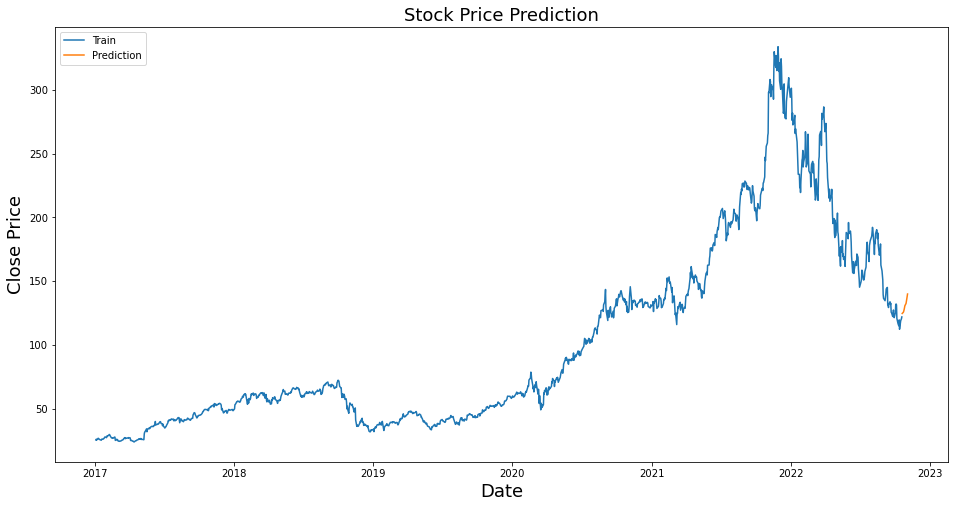

In [979]:
#plot the graph
plt.figure(figsize=(16,8))
plt.plot(train['Close'])
plt.plot(valid['Predictions'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)
plt.title('Stock Price Prediction',fontsize = 18)
plt.legend(['Train', 'Prediction'], loc = 'upper left')
plt.show()


In [984]:
prediction = pd.DataFrame(valid['Predictions'], index = valid.index)
prediction = prediction.rename(columns={'Predictions': "Close"})
prediction = prediction.drop(axis=0, labels='2022-10-21')
prediction.index = np.arange(len(prediction))
prediction.to_csv('HuangXuan_Impl_1.csv')

prediction


,Close
0,125.583116
1,126.440980
2,127.660547
3,129.111405
4,130.714730
5,132.423162
6,134.208746
7,136.055275
8,137.953808
9,139.899718
